# Introduction

São Paulo is a municipality in the Southeast Region of Brazil. The metropolis is an alpha global city (as listed by the GaWC) and the most populous city in Brazil, the Americas, the Western Hemisphere and the Southern Hemisphere. Additionally, São Paulo is the largest Portuguese-speaking city in the world. The municipality is also the world's 4th largest city proper by population. The city is the capital of the surrounding state of São Paulo, the most populous and wealthiest state in Brazil. It exerts strong international influences in commerce, finance, arts and entertainment. The name of the city honors the Apostle, Saint Paul of Tarsus. The city's metropolitan area, the Greater São Paulo, ranks as the most populous in Brazil and the 12th most populous on Earth.

São Paulo is considered the most multicultural city in Brazil. Since 1870 to 2010, approximately 2.3 million immigrants arrived in the state, from all parts of the world. The Italian community is one of the strongest, with a presence throughout the city. Of the 9 million inhabitants of São Paulo, 50% (4.5 million people) have full or partial Italian ancestry. São Paulo has more descendants of Italians than any Italian city (the largest city of Italy is Rome, with 2.5 million inhabitants).

The cuisine of São Paulo is a tourist attraction. The city has 62 cuisines across 12,000 restaurants. During the 10th International Congress of Gastronomy, Hospitality and Tourism (Cihat) conducted in 1997, the city received the title of "World Gastronomy Capital" from a commission formed by 43 nations' representatives.

As part of this project, we will explore restaurants from the main regions of São Paulo, focusing on Italian cuisine. The outcome of this project will be useful for those interested on knowing more about the gastronomic environment in the city.

# Questions (considering the dateset available)
    What localities have the largest number of rated restaurants in the main regions of São Paulo ?
    What localities have the smallest number of rated restaurants in the main regions of São Paulo ?
    What localities have the best rated restaurants in the main regions of São Paulo ?
    What localities have the worst rated restaurants in the main regions of São Paulo ?
    What localities have the largest number of rated Italian restaurants in the main regions of São Paulo ?
    What localities have the best rated Italian restaurants in the main regions of São Paulo ?
    What localities have more nearby venues with Italian restaurants ?


# Data
For this project, the following data will be used:

Data from restaurants situated at the main regions of São Paulo, including Locality, Cuisines, Restaurant Names, Rating, Latitude, Longitude, etc.
    - Data source : Zomato kaggle dataset.
    - Description : This dataset contains the required information to explore various localities of São Paulo.

Nearby places in each locality of the main regions of São Paulo
    - Data source : Foursquare API.
    - Description : By using this API we will get all the venues in each neighborhood.

# Methodology
    Collect restaurants data from Zomato Kaggle dataset.
    Clean up data.
    Visualize data using Folium Python library.
    Generate plots to compare each locality with regards to restaurants.
    Group data based on locality.
    Use Foursquare API to find all venues for each neighborhood.
    Filter out all nearby venues by locality.
    Use aggregate rating from each restaurant to find the best places.
    Run k-means to cluster the localities into 5 clusters.

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/josealexandrefs/Coursera_Capstone/master/zomato.csv', encoding = 'ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_brazil = df[df['Country Code'] == 30]
df_sao_paulo = df_brazil[df_brazil['City'] == 'Sí£o Paulo']
df_sao_paulo.reset_index(drop = True, inplace = True)

df_sao_paulo.replace('Sí£o', 'São', inplace = True, regex = True)
df_sao_paulo.replace('í_ao', 'ção', inplace = True, regex = True)
df_sao_paulo.replace('í_í£o', 'ção', inplace = True, regex = True)
df_sao_paulo.replace('tíÇ', 'to', inplace = True, regex = True)
df_sao_paulo.replace('uí_', 'ui', inplace = True, regex = True)
df_sao_paulo.replace('Praí_a', 'Praça', inplace = True, regex = True)
df_sao_paulo.replace('Repí_blica', 'Republica', inplace = True, regex = True)
df_sao_paulo.replace('Josí©', 'José', inplace = True, regex = True)
df_sao_paulo.replace('Edifí_cio', 'Edificio', inplace = True, regex = True)
df_sao_paulo.replace('Itíçlia', 'Italia', inplace = True, regex = True)
df_sao_paulo.replace('Terraí_o', 'Terraço', inplace = True, regex = True)
df_sao_paulo.replace('MetríÇ', 'Metrô', inplace = True, regex = True)
df_sao_paulo.replace('Fogí£o', 'Fogão', inplace = True, regex = True)
df_sao_paulo.replace('Mocotí_', 'Mocotó', inplace = True, regex = True)
df_sao_paulo.replace('Joí£o', 'João', inplace = True, regex = True)
df_sao_paulo.replace('SíÇnia', 'Sônia', inplace = True, regex = True)
df_sao_paulo.replace('Tabapuí£', 'Tabapuã', inplace = True, regex = True)
df_sao_paulo.replace('Cí©sar', 'César', inplace = True, regex = True)
df_sao_paulo.replace('Fí©lix', 'Félix', inplace = True, regex = True)

df_sao_paulo

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6706313,Cantina Famiglia Mancini,30,São Paulo,"Rua Avanhandava, 81, Bela Vista, São Paulo 10000","Bela Vista, Centro","Bela Vista, Centro, São Paulo",-46.645167,-23.550667,"Italian, Pizza",...,Brazilian Real(R$),No,No,No,No,4,4.5,Dark Green,Excellent,49
1,6704326,Templo da Carne - Marcos Bassi,30,São Paulo,"Rua Treze de Maio, 668, Bela Vista, São Paulo ...","Bela Vista, Centro","Bela Vista, Centro, São Paulo",-46.646333,-23.559000,"Steak, BBQ",...,Brazilian Real(R$),No,No,No,No,4,4.4,Green,Very Good,17
2,6711179,Gopala Hari,30,São Paulo,"Rua Antonio Carlos, 429, Consolação, São Paulo",Consolação,"Consolação, São Paulo",-46.658667,-23.556167,Indian,...,Brazilian Real(R$),No,No,No,No,3,3.1,Orange,Average,5
3,6702797,Jiquitaia,30,São Paulo,"Rua Antonio Carlos, 268, Consolação, São Paulo",Consolação,"Consolação, São Paulo",-46.657523,-23.556710,Brazilian,...,Brazilian Real(R$),No,No,No,No,4,4.1,Green,Very Good,15
4,6700475,Skye - Hotel Unique,30,São Paulo,"Hotel Unique, Avenida Brigadeiro Luis Antonio,...","Hotel Unique, Jardim Paulista","Hotel Unique, Jardim Paulista, São Paulo",-46.666851,-23.581688,"Beverages, International",...,Brazilian Real(R$),No,No,No,No,4,4.8,Dark Green,Excellent,59
5,6713413,Les 3 Brasseurs,30,São Paulo,"Rua Jesuino Arruda, 470, Itaim Bibi, São Paulo",Itaim Bibi,"Itaim Bibi, São Paulo",-46.675110,-23.582135,"French, Brazilian, Beverages",...,Brazilian Real(R$),No,No,No,No,4,4.6,Dark Green,Excellent,30
6,6714340,Red Steak & Burger,30,São Paulo,"Rua Tabapuã, 1417, Itaim Bibi, São Paulo",Itaim Bibi,"Itaim Bibi, São Paulo",-46.683888,-23.585324,"Brazilian, Grill",...,Brazilian Real(R$),No,No,No,No,3,3.9,Yellow,Good,5
7,6710645,Cantinho da Gula,30,São Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, São Pa...",Itaim Bibi,"Itaim Bibi, São Paulo",-46.675667,-23.581000,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
8,6700402,Paris 6 Classique,30,São Paulo,"Rua Haddock Lobo, 1240, Cerqueira César, Jardi...",Jardim Paulista,"Jardim Paulista, São Paulo",-46.666041,-23.561568,French,...,Brazilian Real(R$),No,No,No,No,4,3.4,Orange,Average,73
9,6700846,Kawa Sushi,30,São Paulo,"Alameda Lorena, 300, Jardim Paulista, São Paulo",Jardim Paulista,"Jardim Paulista, São Paulo",-46.657418,-23.571638,"Sushi, Japanese",...,Brazilian Real(R$),No,No,No,No,4,3.5,Yellow,Good,9


# Data Cleaning

In [4]:
# remove unwanted columns and rows

df_sao_paulo_rest = df_sao_paulo [df_sao_paulo.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines',
                                                                       'Aggregate rating','Rating text','Votes']]

In [5]:
df_sao_paulo_rest = df_sao_paulo_rest[df_sao_paulo_rest['Aggregate rating'] != 0.0]

df_sao_paulo_rest.reset_index(drop = True, inplace = True)

df_sao_paulo_rest

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Cantina Famiglia Mancini,"Bela Vista, Centro",-46.645167,-23.550667,"Italian, Pizza",4.5,Excellent,49
1,Templo da Carne - Marcos Bassi,"Bela Vista, Centro",-46.646333,-23.559000,"Steak, BBQ",4.4,Very Good,17
2,Gopala Hari,Consolação,-46.658667,-23.556167,Indian,3.1,Average,5
3,Jiquitaia,Consolação,-46.657523,-23.556710,Brazilian,4.1,Very Good,15
4,Skye - Hotel Unique,"Hotel Unique, Jardim Paulista",-46.666851,-23.581688,"Beverages, International",4.8,Excellent,59
5,Les 3 Brasseurs,Itaim Bibi,-46.675110,-23.582135,"French, Brazilian, Beverages",4.6,Excellent,30
6,Red Steak & Burger,Itaim Bibi,-46.683888,-23.585324,"Brazilian, Grill",3.9,Good,5
7,Paris 6 Classique,Jardim Paulista,-46.666041,-23.561568,French,3.4,Average,73
8,Kawa Sushi,Jardim Paulista,-46.657418,-23.571638,"Sushi, Japanese",3.5,Good,9
9,A Figueira Rubaiyat,Jardim Paulista,-46.669833,-23.565500,"BBQ, Grill, Brazilian",4.3,Very Good,39


In [6]:
# replacing 'Hotel Unique, Jardim Paulista' by 'Jardim Paulista' for Locality consolidation

df_sao_paulo_rest["Locality"].replace({"Hotel Unique, Jardim Paulista": "Jardim Paulista"}, inplace = True)

df_sao_paulo_rest

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Cantina Famiglia Mancini,"Bela Vista, Centro",-46.645167,-23.550667,"Italian, Pizza",4.5,Excellent,49
1,Templo da Carne - Marcos Bassi,"Bela Vista, Centro",-46.646333,-23.559000,"Steak, BBQ",4.4,Very Good,17
2,Gopala Hari,Consolação,-46.658667,-23.556167,Indian,3.1,Average,5
3,Jiquitaia,Consolação,-46.657523,-23.556710,Brazilian,4.1,Very Good,15
4,Skye - Hotel Unique,Jardim Paulista,-46.666851,-23.581688,"Beverages, International",4.8,Excellent,59
5,Les 3 Brasseurs,Itaim Bibi,-46.675110,-23.582135,"French, Brazilian, Beverages",4.6,Excellent,30
6,Red Steak & Burger,Itaim Bibi,-46.683888,-23.585324,"Brazilian, Grill",3.9,Good,5
7,Paris 6 Classique,Jardim Paulista,-46.666041,-23.561568,French,3.4,Average,73
8,Kawa Sushi,Jardim Paulista,-46.657418,-23.571638,"Sushi, Japanese",3.5,Good,9
9,A Figueira Rubaiyat,Jardim Paulista,-46.669833,-23.565500,"BBQ, Grill, Brazilian",4.3,Very Good,39


# Map with the restaurants by clusters

In [7]:
sao_paulo_rest = folium.Map(location = [-23.5489, -46.6388], zoom_start = 12)

X = df_sao_paulo_rest['Latitude']
Y = df_sao_paulo_rest['Longitude']
Z = np.stack((X, Y), axis = 1)

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_sao_paulo_rest ['Cluster'] = clusters

for latitude, longitude, restaurant, cluster in zip(df_sao_paulo_rest['Latitude'], df_sao_paulo_rest['Longitude'], 
                                                    df_sao_paulo_rest['Restaurant Name'], 
                                                    df_sao_paulo_rest['Cluster']):
    label = folium.Popup(restaurant, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'black',
        fill = True,
        fill_color = colors[cluster],
        fill_opacity = 0.7).add_to(sao_paulo_rest)  

sao_paulo_rest

In [8]:
df_sao_paulo_rest

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Cantina Famiglia Mancini,"Bela Vista, Centro",-46.645167,-23.550667,"Italian, Pizza",4.5,Excellent,49,2
1,Templo da Carne - Marcos Bassi,"Bela Vista, Centro",-46.646333,-23.559000,"Steak, BBQ",4.4,Very Good,17,2
2,Gopala Hari,Consolação,-46.658667,-23.556167,Indian,3.1,Average,5,2
3,Jiquitaia,Consolação,-46.657523,-23.556710,Brazilian,4.1,Very Good,15,2
4,Skye - Hotel Unique,Jardim Paulista,-46.666851,-23.581688,"Beverages, International",4.8,Excellent,59,4
5,Les 3 Brasseurs,Itaim Bibi,-46.675110,-23.582135,"French, Brazilian, Beverages",4.6,Excellent,30,4
6,Red Steak & Burger,Itaim Bibi,-46.683888,-23.585324,"Brazilian, Grill",3.9,Good,5,4
7,Paris 6 Classique,Jardim Paulista,-46.666041,-23.561568,French,3.4,Average,73,2
8,Kawa Sushi,Jardim Paulista,-46.657418,-23.571638,"Sushi, Japanese",3.5,Good,9,2
9,A Figueira Rubaiyat,Jardim Paulista,-46.669833,-23.565500,"BBQ, Grill, Brazilian",4.3,Very Good,39,4


# Localities with the largest nbr of rated restaurants in the main regions of São Paulo: Top 3

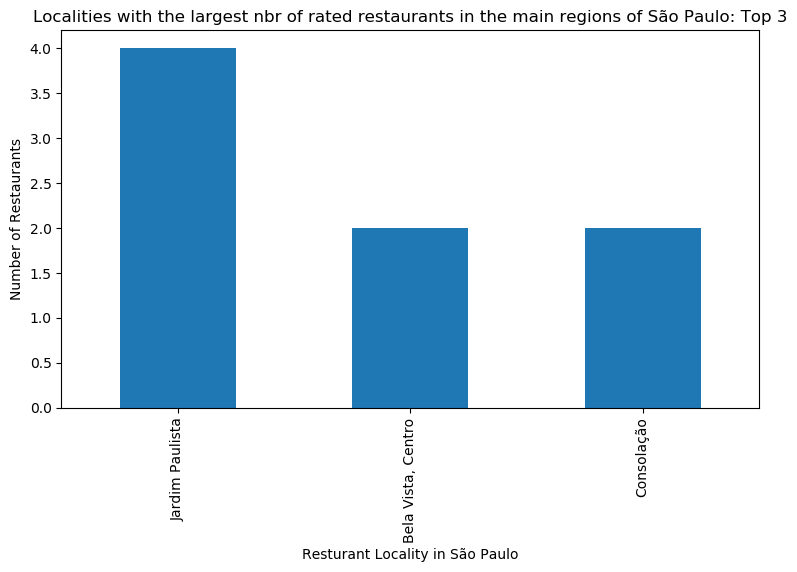

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)

# title
plt.title('Localities with the largest nbr of rated restaurants in the main regions of São Paulo: Top 3')

# giving a bar plot
df_sao_paulo_rest.groupby('Locality')['Restaurant Name'].count().nlargest(3).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Number of Restaurants')

# displays the plot
plt.show()

# Localities with the smallest nbr of rated restaurants in the main regions of São Paulo: Bottom 3

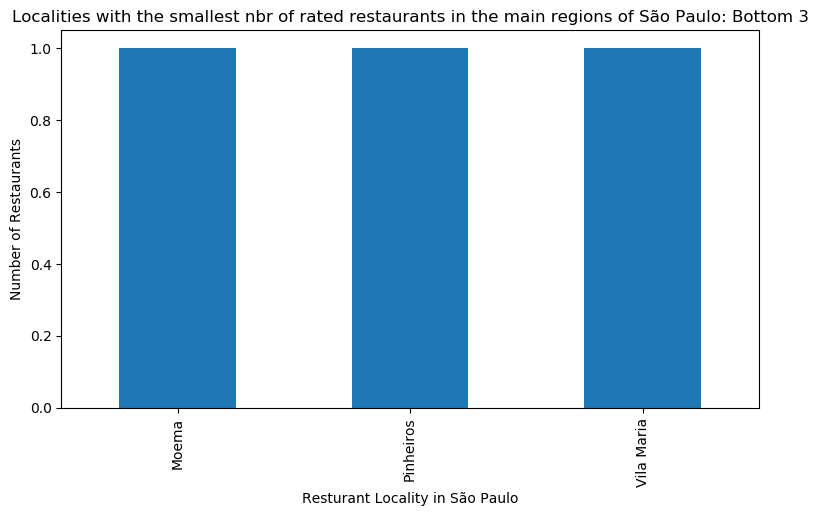

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)

# title
plt.title('Localities with the smallest nbr of rated restaurants in the main regions of São Paulo: Bottom 3')

# giving a bar plot
df_sao_paulo_rest.groupby('Locality')['Restaurant Name'].count().nsmallest(3).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Number of Restaurants')

# displays the plot
plt.show()

# Localities with the best rated restaurants in the main regions of São Paulo: Top 3

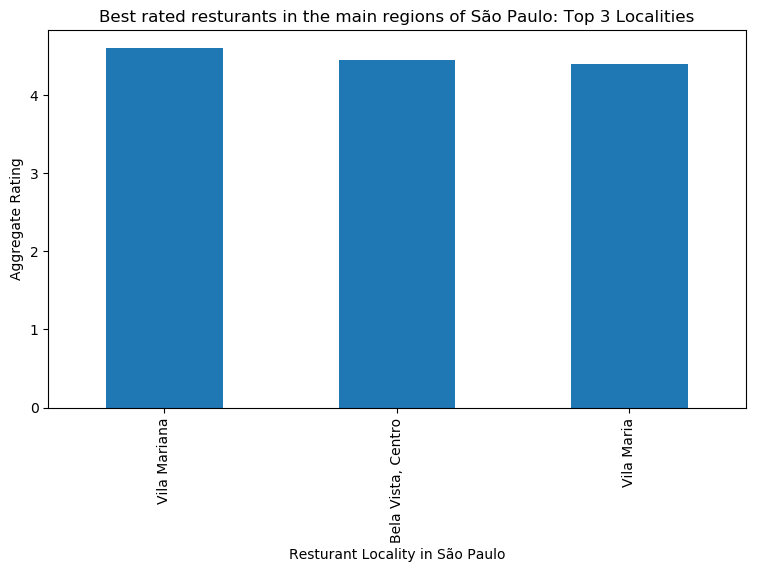

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)

# title
plt.title('Best rated resturants in the main regions of São Paulo: Top 3 Localities')

# giving a bar plot
df_sao_paulo_rest.groupby('Locality')['Aggregate rating'].mean().nlargest(3).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Aggregate Rating')

# displays the plot
plt.show()

# Localities with the worst rated restaurants in the main regions São Paulo: Bottom 3

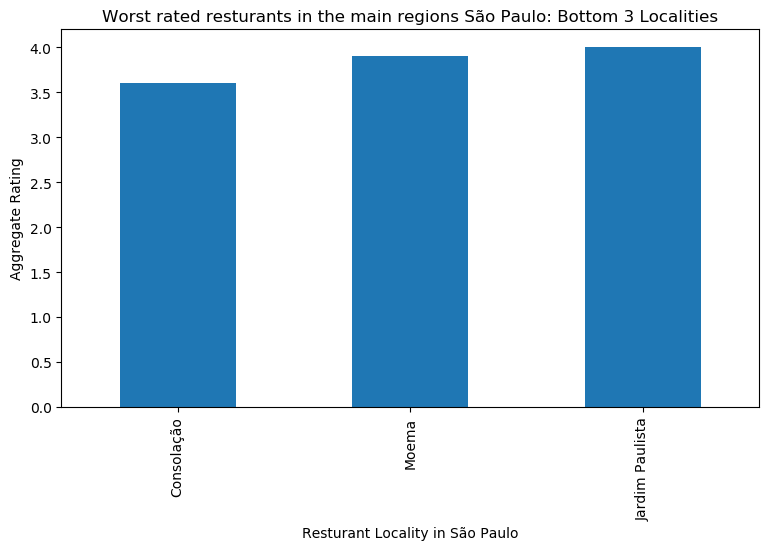

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)

# title
plt.title('Worst rated resturants in the main regions São Paulo: Bottom 3 Localities')

# giving a bar plot
df_sao_paulo_rest.groupby('Locality')['Aggregate rating'].mean().nsmallest(3).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Aggregate Rating')

# displays the plot
plt.show()

# Localities with the largest nbr of Italian restaurants in the main regions of São Paulo: Top 2

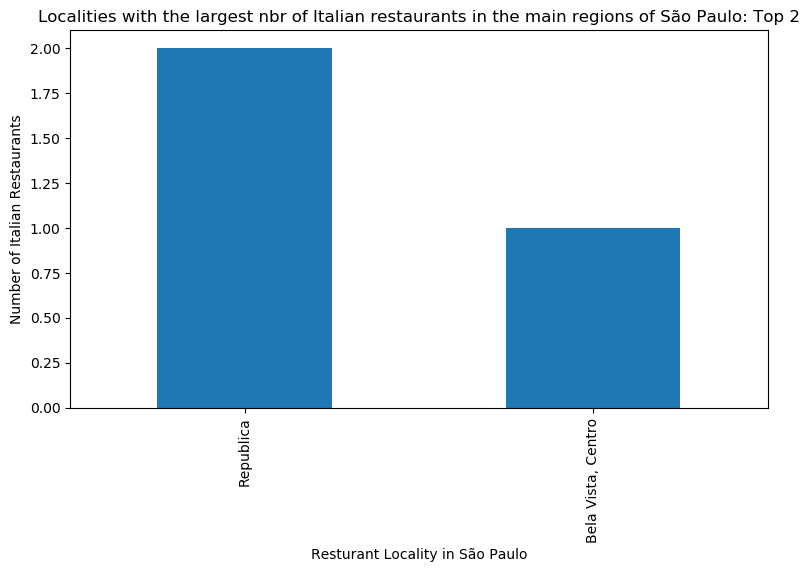

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)

# title
plt.title('Localities with the largest nbr of Italian restaurants in the main regions of São Paulo: Top 2')

# giving a bar plot
df_sao_paulo_rest[df_sao_paulo_rest['Cuisines'].str.contains('Italian')].groupby('Locality')['Restaurant Name'].count().nlargest(2).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Number of Italian Restaurants')

#displays the plot
plt.show()

# Localities with the best rated Italian restaurants in the main regions of São Paulo: Top 2

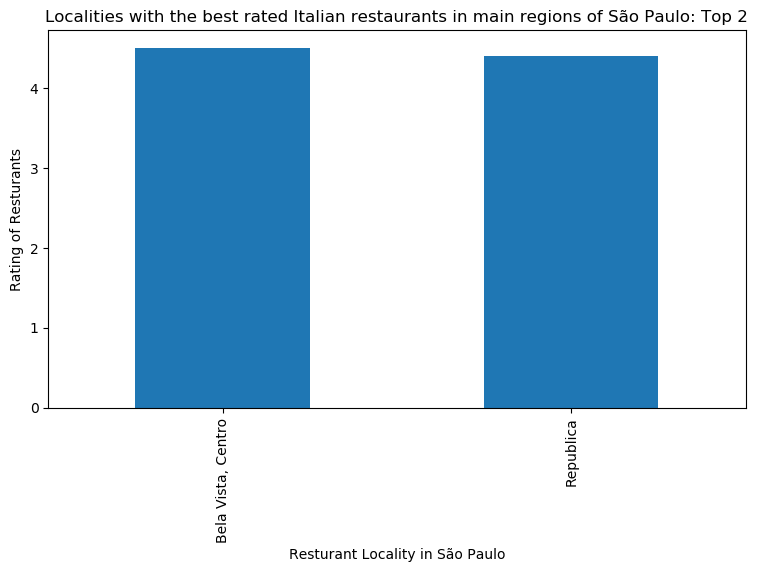

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5), dpi = 100)
# title
plt.title('Localities with the best rated Italian restaurants in main regions of São Paulo: Top 2')

# giving a bar plot
df_sao_paulo_rest[df_sao_paulo_rest['Cuisines'].str.startswith('Italian')].groupby('Locality')['Aggregate rating'].mean().nlargest(2).plot(kind = 'bar')

plt.xlabel('Resturant Locality in São Paulo')
plt.ylabel('Rating of Resturants')

# displays the plot
plt.show()

# Data Transformation

In [15]:
# grouping data based on Locality

df_sao_paulo_rest_loc =  df_sao_paulo_rest.groupby('Locality').count()['Restaurant Name'].to_frame()
df_sao_paulo_rest_rat = df_sao_paulo_rest.groupby('Locality')['Aggregate rating'].mean().to_frame()
df_sao_paulo_rest_cui = df_sao_paulo_rest.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
df_sao_paulo_rest_rtx = df_sao_paulo_rest.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
df_sao_paulo_rest_vot = df_sao_paulo_rest.groupby(['Locality'])['Votes'].sum().to_frame()
df_sao_paulo_rest_lat = df_sao_paulo_rest.groupby('Locality').mean()['Latitude'].to_frame()
df_sao_paulo_rest_lng = df_sao_paulo_rest.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(df_sao_paulo_rest_lat, df_sao_paulo_rest_lng
                    , on = 'Locality').merge(df_sao_paulo_rest_loc
                                             , on = 'Locality').merge(df_sao_paulo_rest_cui
                                                                      , on = 'Locality').merge(df_sao_paulo_rest_rat, 
                                                                                               on = 'Locality').merge(df_sao_paulo_rest_rtx, 
                                                                                                                      on = 'Locality').merge(df_sao_paulo_rest_vot, 
                                                                                                                                             on = 'Locality')

In [16]:
#df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns = ['Locality','Lat','Lng', 'Nbr_of_Restaurants','Cuisines', 'Agg_Rating','Comments','Nbr_of_Votes']
df_final

,Locality,Lat,Lng,Nbr_of_Restaurants,Cuisines,Agg_Rating,Comments,Nbr_of_Votes
0,"Bela Vista, Centro",-23.554833,-46.645750,2,"Italian, Pizza, Steak, BBQ",4.45,"Excellent, Very Good",66
1,Consolação,-23.556438,-46.658095,2,"Indian, Brazilian",3.60,"Average, Very Good",20
2,Itaim Bibi,-23.583730,-46.679499,2,"French, Brazilian, Beverages, Brazilian, Grill",4.25,"Excellent, Good",35
3,Jardim Paulista,-23.570098,-46.665036,4,"Beverages, International, French, Sushi, Japan...",4.00,"Excellent, Average, Good, Very Good",180
4,Moema,-23.592333,-46.671333,1,Sushi,3.90,Good,12
5,Pinheiros,-23.564833,-46.681333,1,"Gourmet Fast Food, Burger",4.30,Very Good,68
6,Republica,-23.545902,-46.642510,2,"Brazilian, Italian, Italian",4.35,Very Good,83
7,Vila Maria,-23.486535,-46.581672,1,"Brazilian, North Eastern",4.40,Very Good,22
8,Vila Mariana,-23.585167,-46.635667,1,"Brazilian, Bar Food, Beverages",4.60,Excellent,58
9,Vila Sônia,-23.609207,-46.746958,1,"Lebanese, Arabian",4.10,Very Good,11


In [17]:
df_final.shape

(10, 8)

# Define Foursquare Credentials and Version

In [18]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'R23F2KKKSZVT3NLGWH44QTTNQ4TOPNEHG2E5X4NIEPELER3C' # Foursquare ID
CLIENT_SECRET = 'MVQHZJBVKZ55TYP0PJ0OEXMCY432YW4PCLH0XYNY4BB5DXLZ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R23F2KKKSZVT3NLGWH44QTTNQ4TOPNEHG2E5X4NIEPELER3C
CLIENT_SECRET:MVQHZJBVKZ55TYP0PJ0OEXMCY432YW4PCLH0XYNY4BB5DXLZ


# Create a function to repeat the same process to all the Restaurant Localities in São Paulo

In [19]:
## create a function to repeat the same process to all the Localities in São Paulo

def getNearbyVenues(names, latitudes, longitudes, radius = 500, LIMIT = 100):
    
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# find the nearby venues in all São Paulo Localities

sao_paulo_venues = getNearbyVenues(names = df_final['Locality'],
                                   latitudes = df_final['Lat'],
                                   longitudes = df_final['Lng']
                                  )

Bela Vista, Centro
Consolação
Itaim Bibi
Jardim Paulista
Moema
Pinheiros
Republica
Vila Maria
Vila Mariana
Vila Sônia


In [21]:
sao_paulo_venues

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bela Vista, Centro",-23.554833,-46.645750,Bar Amigo Giannotti,-23.554334,-46.647667,Dive Bar
1,"Bela Vista, Centro",-23.554833,-46.645750,Padaria Italiana São Domingos,-23.552873,-46.645441,Bakery
2,"Bela Vista, Centro",-23.554833,-46.645750,Padaria 14 de Julho,-23.554519,-46.643976,Bakery
3,"Bela Vista, Centro",-23.554833,-46.645750,Padaria Italianinha,-23.556458,-46.645488,Bakery
4,"Bela Vista, Centro",-23.554833,-46.645750,Rancho Nordestino,-23.555606,-46.647890,Northeastern Brazilian Restaurant
5,"Bela Vista, Centro",-23.554833,-46.645750,Vamp - O Musical,-23.556680,-46.645480,Theater
6,"Bela Vista, Centro",-23.554833,-46.645750,Teatro Sérgio Cardoso,-23.556653,-46.645503,Theater
7,"Bela Vista, Centro",-23.554833,-46.645750,La Penisola,-23.552779,-46.646512,Italian Restaurant
8,"Bela Vista, Centro",-23.554833,-46.645750,Cantina C... Que Sabe!,-23.557149,-46.645739,Italian Restaurant
9,"Bela Vista, Centro",-23.554833,-46.645750,Al Janiah,-23.557531,-46.645273,Bar


In [22]:
sao_paulo_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Bela Vista, Centro",47,47,47,47,47,47
Consolação,100,100,100,100,100,100
Itaim Bibi,100,100,100,100,100,100
Jardim Paulista,84,84,84,84,84,84
Moema,99,99,99,99,99,99
Pinheiros,100,100,100,100,100,100
Republica,100,100,100,100,100,100
Vila Maria,15,15,15,15,15,15
Vila Mariana,49,49,49,49,49,49


In [23]:
print('There are {} uniques categories.'.format(len(sao_paulo_venues['Venue Category'].unique())))

There are 176 uniques categories.


In [24]:
## Analyze each Locality

# one hot encoding
sao_paulo_onehot = pd.get_dummies(sao_paulo_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add Locality column back to dataframe
sao_paulo_onehot['Locality'] = sao_paulo_venues['Locality'] 

# move Locality column to the first column
column_list = sao_paulo_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number + 1:]
sao_paulo_onehot = sao_paulo_onehot[column_list]

sao_paulo_onehot.head()

,Locality,Accessories Store,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Thrift / Vintage Store,Toy / Game Store,Track,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,"Bela Vista, Centro",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bela Vista, Centro",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bela Vista, Centro",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bela Vista, Centro",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bela Vista, Centro",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
sao_paulo_grouped = sao_paulo_onehot.groupby('Locality').mean().reset_index()
sao_paulo_grouped

,Locality,Accessories Store,Airport Terminal,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Thrift / Vintage Store,Toy / Game Store,Track,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,"Bela Vista, Centro",0.00,0.00,0.00,0.00,0.000000,0.021277,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Consolação,0.01,0.00,0.01,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Itaim Bibi,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.010000,0.010000,...,0.00,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
3,Jardim Paulista,0.00,0.00,0.00,0.00,0.000000,0.047619,0.011905,0.000000,0.000000,...,0.00,0.000000,0.011905,0.011905,0.000000,0.000000,0.000000,0.000000,0.011905,0.000000
4,Moema,0.00,0.00,0.00,0.00,0.030303,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.010101,0.010101,0.000000,0.040404,0.010101
5,Pinheiros,0.00,0.00,0.00,0.00,0.000000,0.010000,0.010000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.000000,0.010000,0.000000
6,Republica,0.01,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.010000,0.020000,...,0.00,0.000000,0.000000,0.000000,0.030000,0.000000,0.010000,0.000000,0.000000,0.000000
7,Vila Maria,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Vila Mariana,0.00,0.00,0.00,0.00,0.020408,0.020408,0.000000,0.020408,0.020408,...,0.00,0.020408,0.000000,0.000000,0.040816,0.000000,0.000000,0.020408,0.000000,0.000000
9,Vila Sônia,0.00,0.05,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
sao_paulo_grouped.shape

(10, 177)

In [27]:
## print each Locality along with the top 5 most common nearby venues

num_top_venues = 5

for hood in sao_paulo_grouped['Locality']:
    print("----"+hood+"----")
    temp = sao_paulo_grouped[sao_paulo_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bela Vista, Centro----
                venue  freq
0  Italian Restaurant  0.13
1              Bakery  0.09
2      Farmers Market  0.09
3               Hotel  0.06
4             Theater  0.06


----Consolação----
                  venue  freq
0  Brazilian Restaurant  0.09
1                   Bar  0.06
2          Burger Joint  0.05
3                 Hotel  0.04
4                  Café  0.04


----Itaim Bibi----
                  venue  freq
0   Japanese Restaurant  0.09
1    Italian Restaurant  0.09
2            Restaurant  0.08
3                   Bar  0.06
4  Brazilian Restaurant  0.05


----Jardim Paulista----
                  venue  freq
0    Italian Restaurant  0.13
1  Brazilian Restaurant  0.05
2           Art Gallery  0.05
3    Spanish Restaurant  0.04
4  Gym / Fitness Center  0.04


----Moema----
                  venue  freq
0    Italian Restaurant  0.07
1                Bakery  0.07
2            Restaurant  0.06
3  Brazilian Restaurant  0.05
4         Women's Store  0.04



In [28]:
## put that into a pandas dataframe
## First, write a function to sort the nearby venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 nearby venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
locality_venues_sorted = pd.DataFrame(columns = columns)
locality_venues_sorted['Locality'] = sao_paulo_grouped['Locality']

for ind in np.arange(sao_paulo_grouped.shape[0]):
    locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sao_paulo_grouped.iloc[ind, :], num_top_venues)

locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bela Vista, Centro",Italian Restaurant,Bakery,Farmers Market,Theater,Hotel,Brazilian Restaurant,Café,Snack Place,Flower Shop,Pharmacy
1,Consolação,Brazilian Restaurant,Bar,Burger Joint,Hotel,Gym / Fitness Center,Coffee Shop,Café,Bakery,Ice Cream Shop,Lounge
2,Itaim Bibi,Italian Restaurant,Japanese Restaurant,Restaurant,Bar,Brazilian Restaurant,Hotel,French Restaurant,Ice Cream Shop,Gym / Fitness Center,Pizza Place
3,Jardim Paulista,Italian Restaurant,Art Gallery,Brazilian Restaurant,Spanish Restaurant,Ice Cream Shop,Dessert Shop,Gym / Fitness Center,Restaurant,Bakery,Café
4,Moema,Bakery,Italian Restaurant,Restaurant,Brazilian Restaurant,Café,Pizza Place,Coffee Shop,Women's Store,Hotel,Argentinian Restaurant
5,Pinheiros,Italian Restaurant,Clothing Store,Burger Joint,Ice Cream Shop,Pizza Place,Restaurant,Café,Brazilian Restaurant,Bakery,Coffee Shop
6,Republica,Brazilian Restaurant,Coffee Shop,Bar,Dessert Shop,Café,Tea Room,Theater,Record Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant
7,Vila Maria,Brazilian Restaurant,Pizza Place,Market,Northeastern Brazilian Restaurant,Asian Restaurant,Martial Arts School,Department Store,Event Space,Grocery Store,Ice Cream Shop
8,Vila Mariana,Pizza Place,Ice Cream Shop,Spa,Café,Dance Studio,Bakery,Restaurant,General Entertainment,Vegetarian / Vegan Restaurant,Farmers Market
9,Vila Sônia,Gym / Fitness Center,Construction & Landscaping,Big Box Store,Mexican Restaurant,Café,Bus Station,Middle Eastern Restaurant,Martial Arts School,Churrascaria,Brazilian Restaurant


In [30]:
## Cluster Locality
## Run k-means to cluster the Localities into 5 clusters.

# set number of clusters
kclusters = 5

sao_paulo_clustering = sao_paulo_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(sao_paulo_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(10,)

In [31]:
# add clustering labels
sao_paulo_merged = df_final.head(240)
sao_paulo_merged['Cluster Labels'] = kmeans.labels_

# merge df_final with locality_venues_sorted to add latitude/longitude for each Locality
sao_paulo_merged = sao_paulo_merged.join(locality_venues_sorted.set_index('Locality'), on = 'Locality')

sao_paulo_merged

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Locality,Lat,Lng,Nbr_of_Restaurants,Cuisines,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bela Vista, Centro",-23.554833,-46.645750,2,"Italian, Pizza, Steak, BBQ",4.45,"Excellent, Very Good",66,3,Italian Restaurant,Bakery,Farmers Market,Theater,Hotel,Brazilian Restaurant,Café,Snack Place,Flower Shop,Pharmacy
1,Consolação,-23.556438,-46.658095,2,"Indian, Brazilian",3.60,"Average, Very Good",20,4,Brazilian Restaurant,Bar,Burger Joint,Hotel,Gym / Fitness Center,Coffee Shop,Café,Bakery,Ice Cream Shop,Lounge
2,Itaim Bibi,-23.583730,-46.679499,2,"French, Brazilian, Beverages, Brazilian, Grill",4.25,"Excellent, Good",35,0,Italian Restaurant,Japanese Restaurant,Restaurant,Bar,Brazilian Restaurant,Hotel,French Restaurant,Ice Cream Shop,Gym / Fitness Center,Pizza Place
3,Jardim Paulista,-23.570098,-46.665036,4,"Beverages, International, French, Sushi, Japan...",4.00,"Excellent, Average, Good, Very Good",180,0,Italian Restaurant,Art Gallery,Brazilian Restaurant,Spanish Restaurant,Ice Cream Shop,Dessert Shop,Gym / Fitness Center,Restaurant,Bakery,Café
4,Moema,-23.592333,-46.671333,1,Sushi,3.90,Good,12,0,Bakery,Italian Restaurant,Restaurant,Brazilian Restaurant,Café,Pizza Place,Coffee Shop,Women's Store,Hotel,Argentinian Restaurant
5,Pinheiros,-23.564833,-46.681333,1,"Gourmet Fast Food, Burger",4.30,Very Good,68,0,Italian Restaurant,Clothing Store,Burger Joint,Ice Cream Shop,Pizza Place,Restaurant,Café,Brazilian Restaurant,Bakery,Coffee Shop
6,Republica,-23.545902,-46.642510,2,"Brazilian, Italian, Italian",4.35,Very Good,83,4,Brazilian Restaurant,Coffee Shop,Bar,Dessert Shop,Café,Tea Room,Theater,Record Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant
7,Vila Maria,-23.486535,-46.581672,1,"Brazilian, North Eastern",4.40,Very Good,22,2,Brazilian Restaurant,Pizza Place,Market,Northeastern Brazilian Restaurant,Asian Restaurant,Martial Arts School,Department Store,Event Space,Grocery Store,Ice Cream Shop
8,Vila Mariana,-23.585167,-46.635667,1,"Brazilian, Bar Food, Beverages",4.60,Excellent,58,0,Pizza Place,Ice Cream Shop,Spa,Café,Dance Studio,Bakery,Restaurant,General Entertainment,Vegetarian / Vegan Restaurant,Farmers Market
9,Vila Sônia,-23.609207,-46.746958,1,"Lebanese, Arabian",4.10,Very Good,11,1,Gym / Fitness Center,Construction & Landscaping,Big Box Store,Mexican Restaurant,Café,Bus Station,Middle Eastern Restaurant,Martial Arts School,Churrascaria,Brazilian Restaurant


# Map with the localities by clusters

In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x +(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sao_paulo_merged['Lat'], sao_paulo_merged['Lng'], sao_paulo_merged['Locality'], sao_paulo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = 'black',
        fill = True,
        fill_color = colors[cluster],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

# Analyzing Clusters

In [33]:
## Cluster 1
sao_paulo_merged.loc[sao_paulo_merged['Cluster Labels'] == 0, sao_paulo_merged.columns[[0] + [1] + [2] + list(range(5, sao_paulo_merged.shape[1]))]]

,Locality,Lat,Lng,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Itaim Bibi,-23.583730,-46.679499,4.25,"Excellent, Good",35,0,Italian Restaurant,Japanese Restaurant,Restaurant,Bar,Brazilian Restaurant,Hotel,French Restaurant,Ice Cream Shop,Gym / Fitness Center,Pizza Place
3,Jardim Paulista,-23.570098,-46.665036,4.00,"Excellent, Average, Good, Very Good",180,0,Italian Restaurant,Art Gallery,Brazilian Restaurant,Spanish Restaurant,Ice Cream Shop,Dessert Shop,Gym / Fitness Center,Restaurant,Bakery,Café
4,Moema,-23.592333,-46.671333,3.90,Good,12,0,Bakery,Italian Restaurant,Restaurant,Brazilian Restaurant,Café,Pizza Place,Coffee Shop,Women's Store,Hotel,Argentinian Restaurant
5,Pinheiros,-23.564833,-46.681333,4.30,Very Good,68,0,Italian Restaurant,Clothing Store,Burger Joint,Ice Cream Shop,Pizza Place,Restaurant,Café,Brazilian Restaurant,Bakery,Coffee Shop
8,Vila Mariana,-23.585167,-46.635667,4.60,Excellent,58,0,Pizza Place,Ice Cream Shop,Spa,Café,Dance Studio,Bakery,Restaurant,General Entertainment,Vegetarian / Vegan Restaurant,Farmers Market


In [34]:
## Cluster 2
sao_paulo_merged.loc[sao_paulo_merged['Cluster Labels'] == 1, sao_paulo_merged.columns[[0] + [1] + [2] + list(range(5, sao_paulo_merged.shape[1]))]]

,Locality,Lat,Lng,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Vila Sônia,-23.609207,-46.746958,4.1,Very Good,11,1,Gym / Fitness Center,Construction & Landscaping,Big Box Store,Mexican Restaurant,Café,Bus Station,Middle Eastern Restaurant,Martial Arts School,Churrascaria,Brazilian Restaurant


In [35]:
## Cluster 3
sao_paulo_merged.loc[sao_paulo_merged['Cluster Labels'] == 2, sao_paulo_merged.columns[[0] + [1] + [2] + list(range(5, sao_paulo_merged.shape[1]))]]

,Locality,Lat,Lng,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Vila Maria,-23.486535,-46.581672,4.4,Very Good,22,2,Brazilian Restaurant,Pizza Place,Market,Northeastern Brazilian Restaurant,Asian Restaurant,Martial Arts School,Department Store,Event Space,Grocery Store,Ice Cream Shop


In [36]:
## Cluster 4
sao_paulo_merged.loc[sao_paulo_merged['Cluster Labels'] == 3, sao_paulo_merged.columns[[0] + [1] + [2] + list(range(5, sao_paulo_merged.shape[1]))]]

,Locality,Lat,Lng,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bela Vista, Centro",-23.554833,-46.64575,4.45,"Excellent, Very Good",66,3,Italian Restaurant,Bakery,Farmers Market,Theater,Hotel,Brazilian Restaurant,Café,Snack Place,Flower Shop,Pharmacy


In [37]:
## Cluster 5
sao_paulo_merged.loc[sao_paulo_merged['Cluster Labels'] == 4, sao_paulo_merged.columns[[0] + [1] + [2] + list(range(5, sao_paulo_merged.shape[1]))]]

,Locality,Lat,Lng,Agg_Rating,Comments,Nbr_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Consolação,-23.556438,-46.658095,3.60,"Average, Very Good",20,4,Brazilian Restaurant,Bar,Burger Joint,Hotel,Gym / Fitness Center,Coffee Shop,Café,Bakery,Ice Cream Shop,Lounge
6,Republica,-23.545902,-46.642510,4.35,Very Good,83,4,Brazilian Restaurant,Coffee Shop,Bar,Dessert Shop,Café,Tea Room,Theater,Record Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant


# Conclusion

Considering the main regions of São Paulo:

- Jardim Paulista, Bela Vista and Consolação are the localities with the largest nbr of rated restaurants.

- Moema, Pinheiros and Vila Maria are the localities with the smallest nbr of rated restaurants.

- Vila Mariana, Bela Vista and Vila Maria are the localities with the best rated restaurants.

- Consolação, Moema and Jardim Paulista are the localities with the worst rated restaurants.

- Republica and Bela Vista are the localities with the largest nbr of rated Italian restaurants.

- Bela Vista and Republica are the localities with the best rated Italian restaurants.


- Cluster 1 (Bela Vista, Itaim Bibi, Jardim Paulista, Moema, Pinheiros): it is most recommended for Italian Restaurant.
- Cluster 2 (Vila Maria): it is most recommended for Market, Pizza and Brazilian Restaurant.
- Cluster 3 (Consolação, Republica): it is most recommended for Brazilian Restaurant, Bar and Coffee Shop.
- Cluster 4 (Vila Mariana): it is most recommended for Ice Cream, Pizza and Bakery.
- Cluster 5 (Vila Sonia): it is most recommended for Pet Store, Gym and Construction & Landscaping.


